In [1]:
import os
import sys

# --- Tự động trỏ về thư mục gốc project (D:/MBTI) ---
# Lấy thư mục hiện tại (đang ở notebooks/)
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# Đổi working directory
os.chdir(project_root)
print("Current working dir:", os.getcwd())

# Thêm src/ vào PYTHONPATH để import module

Current working dir: d:\MBTI


In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from src.data import load_datasets
from src.models import get_model
from src.train import train_and_log
from src.eval import evaluate_and_plot
import json

In [5]:
# 1. Load data
train_df, valid_df, test_df = load_datasets("data/mbti.csv")

In [6]:
# --- Cell 4: Load model ---
model = get_model("sentence-transformers/all-MiniLM-L6-v2")

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
run_logs = {}
for label in ["IE", "NS", "TF", "JP"]:
    run_logs[label] = train_and_log(
        model,
        train_df, valid_df, test_df,
        label,
        log_path=f"reports/{label}_log.json"
    )

# Lưu tất cả logs vào 1 file
with open("reports/run_logs.json", "w") as f:
    json.dump(run_logs, f, indent=2)

Batches: 100%|██████████| 28/28 [00:02<00:00, 11.46it/s]


[IE] Done. Val Acc=0.705, Test Acc=0.691
Đã lưu model cho [IE] tại models/clf_IE.joblib


Batches: 100%|██████████| 28/28 [00:02<00:00, 11.41it/s]


[NS] Done. Val Acc=0.689, Test Acc=0.722
Đã lưu model cho [NS] tại models/clf_NS.joblib


Batches: 100%|██████████| 28/28 [00:02<00:00, 10.99it/s]


[TF] Done. Val Acc=0.724, Test Acc=0.706
Đã lưu model cho [TF] tại models/clf_TF.joblib


Batches: 100%|██████████| 28/28 [00:02<00:00, 11.00it/s]


[JP] Done. Val Acc=0.663, Test Acc=0.627
Đã lưu model cho [JP] tại models/clf_JP.joblib


--- Bảng tổng hợp kết quả ---
Dimension  Val Accuracy  Val F1-score  Test Accuracy  Test F1-score
       IE      0.704729      0.653633       0.691244       0.627956
       NS      0.688581      0.567308       0.722350       0.594797
       TF      0.724337      0.722920       0.706221       0.705498
       JP      0.663206      0.653788       0.626728       0.616758
------------------------------

--- Phân tích chi tiết cho [IE] ---
Classification Report trên tập Test:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       667
           1       0.39      0.60      0.47       201

    accuracy                           0.69       868
   macro avg       0.62      0.66      0.63       868
weighted avg       0.75      0.69      0.71       868



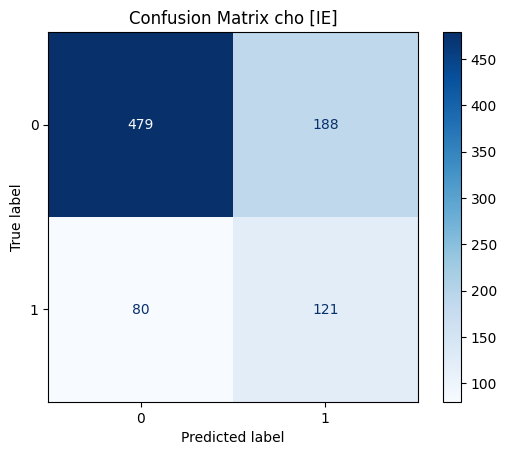

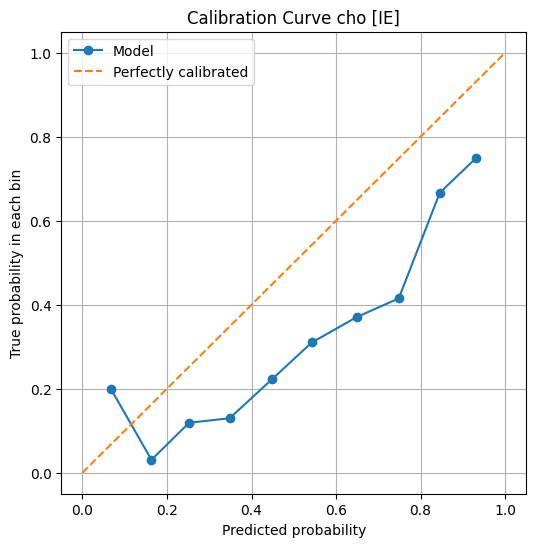


--- Phân tích chi tiết cho [NS] ---
Classification Report trên tập Test:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       749
           1       0.27      0.59      0.37       119

    accuracy                           0.72       868
   macro avg       0.59      0.67      0.59       868
weighted avg       0.83      0.72      0.76       868



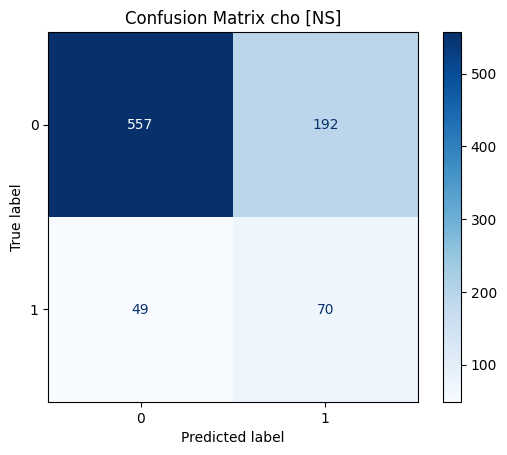

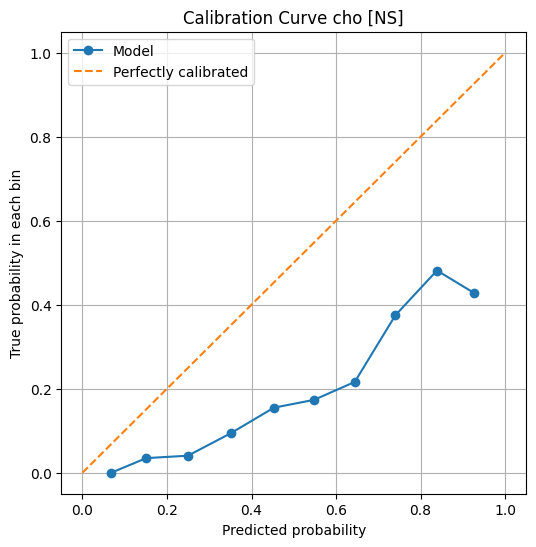


--- Phân tích chi tiết cho [TF] ---
Classification Report trên tập Test:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       399
           1       0.74      0.70      0.72       469

    accuracy                           0.71       868
   macro avg       0.71      0.71      0.71       868
weighted avg       0.71      0.71      0.71       868



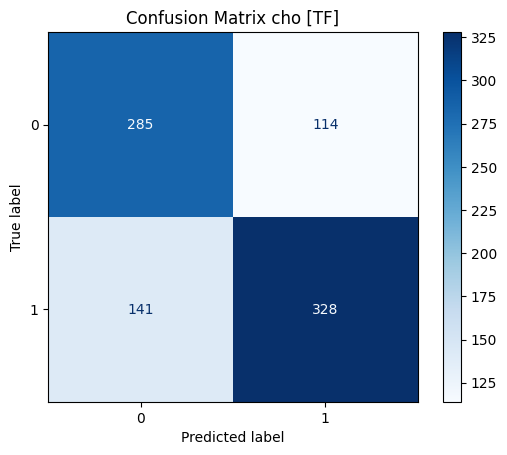

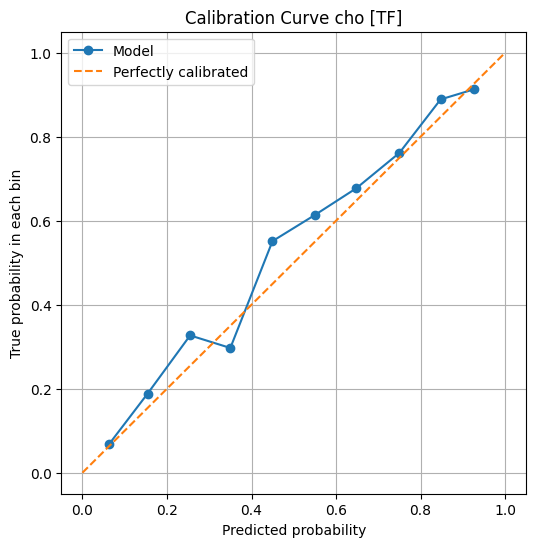


--- Phân tích chi tiết cho [JP] ---
Classification Report trên tập Test:
              precision    recall  f1-score   support

           0       0.52      0.59      0.55       342
           1       0.71      0.65      0.68       526

    accuracy                           0.63       868
   macro avg       0.62      0.62      0.62       868
weighted avg       0.64      0.63      0.63       868



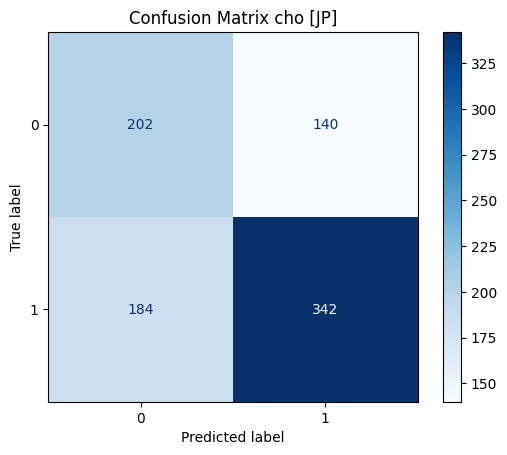

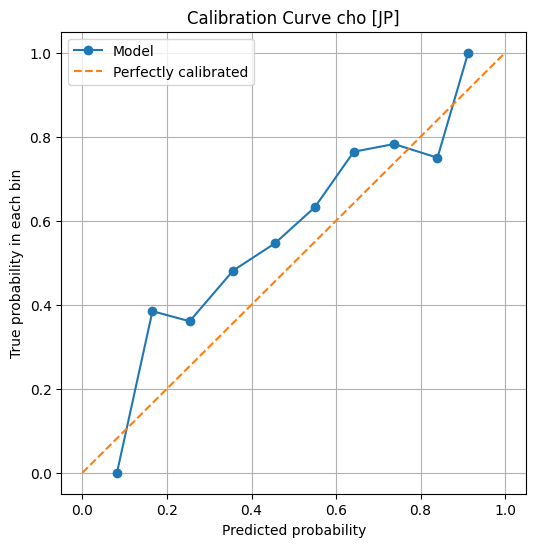

  Dimension  Val Accuracy  Val F1-score  Test Accuracy  Test F1-score
0        IE      0.704729      0.653633       0.691244       0.627956
1        NS      0.688581      0.567308       0.722350       0.594797
2        TF      0.724337      0.722920       0.706221       0.705498
3        JP      0.663206      0.653788       0.626728       0.616758


In [8]:
result = evaluate_and_plot("reports/run_logs.json")
print(result)